# Ridge Regression

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

Rozważmy następujący zbiór punktów:

In [5]:
true_fun = lambda X: np.cos(1.5 * np.pi * X)
n_samples=20
x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1
x=np.vstack(x)

# Zadanie 
Proszę wykonać regresję (Ridge Regression) na powyższym zbiorze danych 

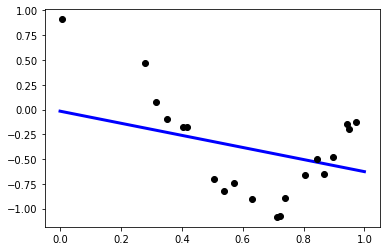

In [6]:
clf = Ridge(alpha=1.0)
clf.fit(x, y) 

x_plot = np.vstack(np.linspace(0, 1, 20))
plt.plot(x_plot, clf.predict(x_plot), color='blue',linewidth=3)
plt.plot(x, y, 'ok');
plt.show()

## Regresja liniowa

LR degree 2
LR degree 20


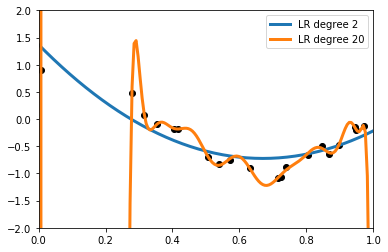

In [7]:
# prepare models
models = []
predicts = []
names=[]
models.append(('LR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('LR degree 20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))

x_plot = np.vstack(np.linspace(-3, 3, 1000))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
x_plot = np.vstack(np.linspace(-3, 3, 1000))
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

# Zadanie 
Proszę wykonać 
* regresję dla wielomianów o stopniu **20**
* regresję (Ridge Regression) dla wielomianów o stopniu **20**



LR degree 20
Ridge degree 20


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


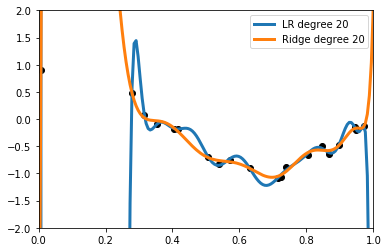

In [11]:
# prepare models
models = []
predicts = []
names=[]
models.append(('LR degree 20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))
models.append(('Ridge degree 20', make_pipeline(PolynomialFeatures(20), linear_model.Ridge(alpha=0.00000000000000000000000000000000000000000000000001)) ))

x_plot = np.vstack(np.linspace(-3, 3, 1000))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
x_plot = np.vstack(np.linspace(-3, 3, 1000))
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

# Zadanie 
Wykonaj k-fold cross-validation dla:

- regrsji linowej
- regrsji wielomianowej stopnia 2 
- regrsji wielomianowej stopnia 5 
- regrsji wielomianowej stopnia 25  
- regrsji Ridge wielomianowej stopnia 2 alpha=10.0
- regrsji Ridge wielomianowej stopnia 5 alpha=10.0
- regrsji Ridge wielomianowej stopnia 25 alpha=10.0 

oraz podaj uśrednione wartości dla każdej z nich oraz wykonaj barplot.

In [24]:
# prepare models
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('Ridge LR', linear_model.Ridge(alpha=1.0)))
models.append(('PR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('Ridge PR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.Ridge(alpha=10.0)) ))
models.append(('PR degree 3', make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression()) ))
models.append(('Ridge PR degree 3', make_pipeline(PolynomialFeatures(3), linear_model.Ridge(alpha=1.0)) ))
models.append(('PR degree 4', make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression()) ))
models.append(('Ridge PR degree 4', make_pipeline(PolynomialFeatures(4), linear_model.Ridge(alpha=1.0)) ))
models.append(('PR degree 110', make_pipeline(PolynomialFeatures(10), linear_model.LinearRegression()) ))
models.append(('Ridge PR degree 10', make_pipeline(PolynomialFeatures(10), linear_model.Ridge(alpha=10.0)) ))

# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_absolute_error'
#scoring = 'r2'

In [25]:
seed = 7
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)



LR: -0.425397 (0.312009)
Ridge LR: -0.408316 (0.280123)
PR degree 2: -0.192806 (0.102453)
Ridge PR degree 2: -0.465587 (0.317624)
PR degree 3: -0.140955 (0.103494)
Ridge PR degree 3: -0.428930 (0.306233)
PR degree 4: -0.118655 (0.072356)
Ridge PR degree 4: -0.425296 (0.301934)
PR degree 110: -11.791699 (27.448457)
Ridge PR degree 10: -0.480113 (0.303935)


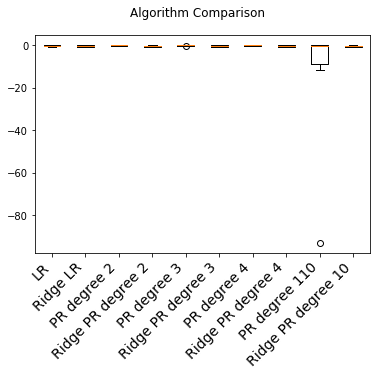

In [26]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=45, ha='right', fontsize=14)
plt.show()  

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr alpha. 

In [16]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=12), linear_model.Ridge()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7],
                    'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
                    cv=5,
                    refit=True)
grid.fit(x, y)
grid.best_params_

{'polynomialfeatures__degree': 3, 'ridge__alpha': 0.001}

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr <tt>alpha</tt> za pomocą metody <tt>GridSearchCV</tt> dla danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

In [12]:
import pandas as pd
df_adv = pd.read_csv('Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [18]:
from sklearn.model_selection import GridSearchCV
seed=123
kfold = model_selection.KFold(n_splits=5, random_state=seed)

grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.Ridge(random_state=seed)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7],
                    'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 200, 201, 300, 1000]},
                    cv=kfold,
                    refit=True)
grid.fit(X, y)
grid.best_params_

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.01834e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.23833e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.00669e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=9.47512e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.03773e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=2.5559e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=2.36375e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=2.65273e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=2.40839e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=2.7539e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\rid

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.55387e-23): result may not be accurate.
  overwrite_a=True).T
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.49427e-23): result may not be accurate.
  overwrite_a=True).T
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.71544e-23): result may not be accurate.
  overwrite_a=True).T
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.51088e-23): result may not be accurate.
  overwrite_a=True).T
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.78763e-23): result may not be accurate.
  overwrite_a=True).T
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=5.66977e-29): result may not be accurate.
  overwrite_a=True).T
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=5.3022e-29): result may not be accurate.
  overwrite_a=True).T
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=6.1763e-29): result may not be accurate.
  overwrite_a=True).T
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.85818e-28): result may not be accurate.
  overwrite_a=True).T
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.70564e-28): result may not be accurate.
  overwrite_a=True).T
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\rid

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=3.91727e-34): result may not be accurate.
  overwrite_a=True).T
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.06159e-34): result may not be accurate.
  overwrite_a=True).T
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.62888e-34): result may not be accurate.
  overwrite_a=True).T
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=3.52948e-34): result may not be accurate.
  overwrite_a=True).T
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=4.92992e-34): result may not be accurate.
  overwrite_a=True).T
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\r

{'polynomialfeatures__degree': 4, 'ridge__alpha': 200}

In [19]:
from sklearn import  metrics
metrics.r2_score(grid.best_estimator_.predict(X) , y )

0.9946169465598221